In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [3]:
df_new = df[['Age', 'Income']].copy()
df_new_col = list(df_new.columns)
df_new.head(5)

,Age,Income
0,68,28561.99
1,27,21704.77
2,50,9609.57
3,48,18925.23
4,83,40074.19


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_new)
df_scaled = scaler.transform(df_new)
df_scaled_2 = pd.DataFrame(df_scaled, columns = df_new_col)


In [5]:
df_scaled_2.head(5)

,Age,Income
0,0.720925,-0.398778
1,-1.259957,-0.641954
2,-0.148730,-1.070885
3,-0.245359,-0.740525
4,1.445638,0.009478


In [6]:
df_scaled_2.to_csv(r'C:\Users\jorda\OneDrive\Documents\WGU Stuff\D212\JTompkins_scaled_data_D212PA1.csv')

In [7]:

distortions = []
num_cluster = range(1,11)
for k in num_cluster:
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_scaled_2)
    distortions.append(kmeans.inertia_)
    


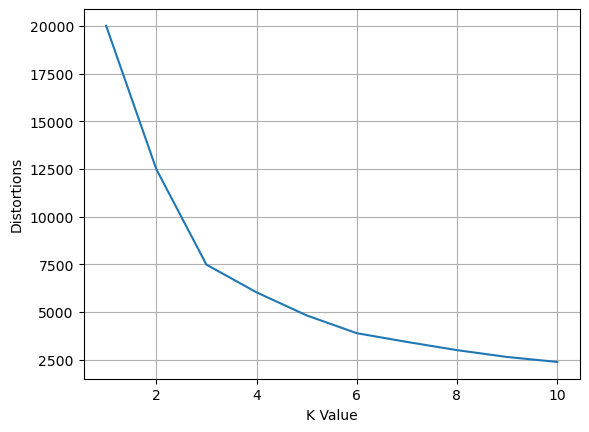

In [8]:
plt.grid()
plt.plot(num_cluster, distortions)
plt.xlabel("K Value")
plt.ylabel("Distortions")
plt.show()

In [9]:
kmeans = KMeans(n_clusters  =3)

In [10]:
y_predicted = kmeans.fit_predict(df_scaled_2)

In [11]:
df_new['Clusters'] = y_predicted

In [12]:
score = silhouette_score(df_scaled_2, kmeans.labels_)

In [13]:
print(score)

0.42418300682831084


In [14]:
df_new.groupby('Clusters').mean()

,Age,Income
Clusters,,
0,71.799852,29837.765842
1,34.998093,29689.818077
2,53.028048,87257.570143
